<a href="https://colab.research.google.com/github/pcashman21/feral-cat-census/blob/main/src/notebooks/yolo_training/train_yolo_using_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook trains a YOLO v8 segmentation model with data downloaded from the Roboflow project feral-cat-segmentation.

In [4]:
!mkdir data

In [ ]:
!unzip /content/feral-cat-segmentation.v1i.yolov8.zip

In [5]:
!cat /content/data/data.yaml

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images

nc: 1
names: ['cat']

roboflow:
  workspace: paul-cashman-mxgwb
  project: feral-cat-segmentation
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/paul-cashman-mxgwb/feral-cat-segmentation/dataset/1


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [11]:
# Load a pre-trained YOLOv8 segmentation model
model = YOLO("yolov8m-seg.yaml")
model = YOLO("yolov8m-seg.pt")


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 52.4M/52.4M [00:00<00:00, 223MB/s]


In [13]:
mkdir /content/data/results

In [14]:
project = '/content/data/results'
name = '200-epochs-'

In [15]:
results = model.train(data='/content/data/data.yaml', epochs=200, project=project, name=name, patience=0, batch=4, imgsz=640)

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/data/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data/results, name=200-epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 191MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/data/train/labels... 2054 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2054/2054 [00:01<00:00, 1061.32it/s]

train: WARNING ⚠️ /content/data/train/images/group0017_jpeg.rf.98b632921f1aba13b3607eb75dce4dca.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0017_jpeg.rf.9b2367481f771a8596244d2d80c9429c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.3f1a9f9121cb81b02239a1cb51ba65a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.800153fee9c10151ca394261921e72d2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0235_jpeg.rf.8f2a0ec911a679e7a47526c6c9328918.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0313_jpeg.rf.1fcbd939cde0d6f6d09c4850327ba710.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/group0313_jpeg.rf.b4bb3baca1ccc934a35aa85fda8f3df3.jpg: 1 duplicate labels removed
train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valid/labels... 195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<00:00, 1067.03it/s]


val: New cache created: /content/data/valid/labels.cache
Plotting labels to /content/data/results/200-epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2443: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if size_prods == 1:
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2443: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if size_prods == 1:
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2443: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that th

200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.01G      1.194      2.283      1.542       1.41         28        640: 100%|██████████| 514/514 [03:54<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        195        785      0.199      0.581      0.167     0.0935      0.187      0.527      0.135     0.0644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.23G      1.369      2.574       1.66      1.534         27        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.14it/s]

                   all        195        785       0.63      0.609      0.617      0.358      0.649      0.591      0.612      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.91G      1.341      2.581      1.639      1.532         14        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.60it/s]

                   all        195        785      0.664      0.597      0.656      0.398      0.655       0.58      0.633      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.64G      1.276      2.438      1.551      1.488         17        640: 100%|██████████| 514/514 [03:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]

                   all        195        785      0.687      0.659      0.708      0.447      0.721      0.651       0.71      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.24G      1.221      2.324      1.466      1.445          8        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]


                   all        195        785      0.691      0.668      0.714      0.454      0.717      0.668      0.719      0.451

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.08G       1.15      2.161      1.356      1.395         18        640: 100%|██████████| 514/514 [03:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]

                   all        195        785      0.749      0.673      0.734      0.493      0.762       0.66      0.737      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200         3G      1.081      2.049      1.262       1.36          8        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]

                   all        195        785      0.788      0.655      0.751      0.506      0.793      0.665      0.753      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.09G      1.064      1.992      1.231      1.342         42        640: 100%|██████████| 514/514 [03:42<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

                   all        195        785      0.779      0.664      0.756       0.53      0.789       0.67      0.753      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.22G       1.01       1.93       1.18       1.31         13        640: 100%|██████████| 514/514 [03:39<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

                   all        195        785      0.732       0.71      0.772      0.538      0.746       0.72      0.778      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.14G       1.01      1.899      1.137      1.304         22        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.43it/s]

                   all        195        785      0.814      0.731      0.819      0.588      0.823      0.738      0.821       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.02G     0.9628      1.807      1.077      1.275         17        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.78it/s]

                   all        195        785      0.773      0.707       0.79      0.572      0.783       0.71      0.793      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.93G     0.9678      1.841      1.093      1.292         18        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]

                   all        195        785      0.826      0.713      0.818      0.596      0.807      0.734      0.805      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.01G     0.9394      1.735       1.04      1.253          8        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.51it/s]

                   all        195        785      0.806      0.764      0.834      0.614      0.863      0.732       0.84       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.97G     0.9275      1.731      1.021      1.243         26        640: 100%|██████████| 514/514 [03:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.47it/s]

                   all        195        785      0.827      0.712      0.811        0.6        0.8      0.739      0.815      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.52G     0.8972      1.653      0.975      1.227         18        640: 100%|██████████| 514/514 [03:54<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.21it/s]

                   all        195        785      0.828      0.722      0.809      0.613      0.821       0.73      0.812       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.04G     0.8723       1.64     0.9666      1.207         13        640: 100%|██████████| 514/514 [03:37<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]

                   all        195        785      0.841      0.724      0.817      0.614      0.844      0.726      0.818      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.03G     0.8622       1.58     0.9287      1.201         14        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        195        785      0.817      0.769      0.831      0.627      0.823      0.776      0.837       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.98G      0.842      1.562     0.8888      1.189         10        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.57it/s]

                   all        195        785      0.802       0.78      0.837      0.639      0.812      0.791      0.843      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.01G     0.8129      1.503     0.8477      1.172         18        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]


                   all        195        785      0.807      0.741      0.824      0.634      0.815      0.748      0.826      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.05G     0.8192      1.535     0.8657       1.17          7        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all        195        785      0.851      0.747       0.83      0.628      0.862       0.75      0.836      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200         3G     0.8016      1.478     0.8459      1.161          3        640: 100%|██████████| 514/514 [03:37<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]

                   all        195        785      0.811      0.781       0.83      0.634      0.829      0.782      0.835      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.01G     0.8024      1.478      0.832      1.158          8        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]

                   all        195        785      0.834      0.753      0.846      0.637      0.864      0.746      0.846      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.05G      0.803      1.446     0.8216      1.158         15        640: 100%|██████████| 514/514 [03:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.31it/s]

                   all        195        785       0.84      0.737      0.821      0.625      0.863      0.731      0.835        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.14G     0.7915      1.464     0.8287      1.151         14        640: 100%|██████████| 514/514 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.48it/s]

                   all        195        785      0.852      0.754      0.847      0.655      0.857      0.763      0.854      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.96G     0.7814      1.439     0.8099      1.149          6        640: 100%|██████████| 514/514 [03:33<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.33it/s]

                   all        195        785      0.841       0.78      0.846      0.654      0.846      0.786      0.849      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.01G     0.7374      1.344     0.7319      1.118         15        640: 100%|██████████| 514/514 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.50it/s]

                   all        195        785      0.865      0.768      0.859      0.665      0.879       0.78      0.871      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.95G     0.7511      1.372     0.7682      1.123          9        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        195        785      0.883      0.772      0.849      0.655      0.887      0.776      0.856      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.05G     0.7315      1.335     0.7457      1.122          9        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]

                   all        195        785      0.882       0.74      0.845      0.658      0.897      0.749      0.854      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.92G     0.7379      1.357      0.748      1.118         18        640: 100%|██████████| 514/514 [03:34<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.09it/s]

                   all        195        785      0.864      0.741      0.844      0.649       0.87      0.746      0.851      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.96G     0.7406      1.349     0.7355      1.113          4        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]

                   all        195        785      0.863       0.75       0.85      0.667      0.876      0.754      0.851      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.13G     0.7124        1.3     0.7053      1.097         12        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.79it/s]

                   all        195        785      0.872      0.778       0.86       0.67      0.878      0.789      0.863      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.95G     0.7209      1.324     0.7144      1.108         14        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]

                   all        195        785      0.862      0.757       0.85      0.656      0.877      0.769      0.857      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.01G     0.6983      1.279     0.6791      1.084          8        640: 100%|██████████| 514/514 [03:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

                   all        195        785      0.844      0.751       0.83      0.636      0.861      0.759      0.837      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.92G     0.7072      1.283     0.6947      1.086         19        640: 100%|██████████| 514/514 [03:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

                   all        195        785       0.88      0.758      0.859      0.662      0.896      0.771      0.862      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.96G     0.6937      1.289     0.6811      1.087         21        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        195        785      0.854      0.772       0.85      0.657      0.855      0.791      0.858      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.02G     0.6816      1.276     0.6692      1.084         13        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.39it/s]

                   all        195        785      0.861      0.772      0.855      0.675      0.874      0.785      0.864      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.92G     0.6837      1.261     0.6739      1.087         15        640: 100%|██████████| 514/514 [03:39<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

                   all        195        785      0.887      0.799      0.875      0.679      0.893      0.811       0.88      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.12G     0.6829      1.248     0.6629      1.076         16        640: 100%|██████████| 514/514 [03:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]

                   all        195        785      0.869      0.781      0.851       0.67      0.874      0.789      0.859      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.96G     0.6695      1.216     0.6482      1.069          5        640: 100%|██████████| 514/514 [03:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        195        785      0.872      0.806      0.871      0.683      0.874       0.81      0.879      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200         3G     0.6678      1.215     0.6465       1.07          8        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.24it/s]

                   all        195        785      0.887      0.786      0.868      0.691      0.891      0.791      0.868      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.03G     0.6564      1.203     0.6223       1.06         12        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.91it/s]

                   all        195        785      0.841      0.809      0.869       0.69       0.85      0.818       0.88      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.18G     0.6308      1.147     0.6042      1.047         14        640: 100%|██████████| 514/514 [03:42<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.21it/s]

                   all        195        785      0.877      0.775      0.853      0.667      0.892      0.768       0.86      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.06G     0.6557      1.209     0.6245      1.049         28        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]

                   all        195        785      0.876      0.767      0.865       0.68      0.884      0.771      0.861      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.08G     0.6554      1.172     0.6251      1.056         17        640: 100%|██████████| 514/514 [03:39<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]

                   all        195        785      0.847      0.811      0.876      0.699      0.891      0.792       0.88      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.03G     0.6581      1.197     0.6125      1.048          5        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        195        785      0.876      0.782      0.859      0.696      0.897      0.797      0.871      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200         3G     0.6388      1.147     0.5961       1.05         19        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        195        785       0.88       0.79      0.871      0.692      0.879      0.799      0.871      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.91G     0.6408      1.184     0.6098      1.049         31        640: 100%|██████████| 514/514 [03:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.50it/s]

                   all        195        785      0.873      0.795      0.872      0.683      0.879      0.789      0.872      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.95G     0.6358      1.146     0.5866       1.04          5        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.20it/s]

                   all        195        785       0.88      0.784       0.86      0.687      0.891      0.792      0.867      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.18G     0.6154      1.117     0.5776      1.031          8        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.20it/s]

                   all        195        785       0.88      0.788      0.867      0.696      0.886      0.793      0.865      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.05G     0.6306      1.157     0.5921      1.043         21        640: 100%|██████████| 514/514 [03:39<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all        195        785      0.883      0.796      0.868      0.701      0.888      0.807      0.876      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.98G     0.6188      1.141     0.5732       1.03         18        640: 100%|██████████| 514/514 [03:34<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]

                   all        195        785      0.862      0.797      0.868      0.697      0.879      0.813      0.877      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.02G     0.6083       1.12     0.5726      1.027         12        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.42it/s]

                   all        195        785      0.864      0.809      0.874      0.695       0.86      0.815      0.876      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.94G     0.6164      1.127     0.5655      1.033         12        640: 100%|██████████| 514/514 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.33it/s]

                   all        195        785      0.885      0.808      0.874      0.702      0.912      0.791      0.869      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200       2.9G      0.608      1.091     0.5432      1.026         13        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.32it/s]

                   all        195        785      0.885      0.803      0.883      0.715      0.898      0.804      0.881      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.12G     0.5898      1.094     0.5402      1.022          8        640: 100%|██████████| 514/514 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        195        785      0.886      0.791      0.865      0.703      0.879      0.818      0.877      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.97G     0.5869      1.057     0.5408      1.018         12        640: 100%|██████████| 514/514 [03:36<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.56it/s]

                   all        195        785      0.861       0.81      0.869        0.7      0.858      0.829      0.874      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.14G     0.5895      1.067     0.5339      1.017         12        640: 100%|██████████| 514/514 [03:35<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.43it/s]

                   all        195        785       0.89      0.794      0.873      0.706      0.911      0.798      0.882      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.91G     0.5968      1.082     0.5463      1.022          6        640: 100%|██████████| 514/514 [03:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.99it/s]

                   all        195        785      0.891      0.792       0.87      0.705      0.898      0.796      0.875      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.97G     0.5849       1.06     0.5388      1.018         12        640: 100%|██████████| 514/514 [03:35<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]

                   all        195        785      0.905      0.777      0.873      0.711      0.878       0.81      0.877      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.19G     0.5819      1.051     0.5311      1.012         50        640: 100%|██████████| 514/514 [03:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.46it/s]

                   all        195        785      0.875      0.801      0.862      0.688      0.878      0.805      0.866      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.92G      0.576      1.048     0.5203      1.002          2        640: 100%|██████████| 514/514 [03:34<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.06it/s]

                   all        195        785      0.877      0.813       0.88      0.713       0.89      0.821      0.884      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.08G     0.5837      1.055     0.5189      1.007         23        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        195        785      0.881      0.792      0.873      0.696      0.882      0.793       0.87      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.31G     0.5699      1.028      0.515      1.005         11        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.39it/s]

                   all        195        785      0.888      0.813      0.873      0.712      0.927      0.792      0.874      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.09G     0.5656       1.01     0.5114     0.9982         10        640: 100%|██████████| 514/514 [03:39<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.42it/s]

                   all        195        785      0.908      0.787      0.878      0.719       0.92      0.797      0.878      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.95G     0.5664      1.025     0.5099      1.004         23        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.11it/s]

                   all        195        785      0.902      0.772      0.875       0.71       0.89      0.812      0.887      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.93G     0.5649      1.015     0.4998     0.9964          7        640: 100%|██████████| 514/514 [03:39<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]

                   all        195        785      0.868      0.808      0.869      0.708      0.908      0.792      0.877      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.98G     0.5638      1.028     0.4962     0.9941         12        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.81it/s]

                   all        195        785      0.885      0.791      0.871      0.702      0.892      0.795      0.874      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200       3.1G     0.5669      1.033     0.5076     0.9981          9        640: 100%|██████████| 514/514 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

                   all        195        785      0.862      0.796      0.865      0.707      0.879      0.803      0.875      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.98G     0.5604      1.013      0.507     0.9984         42        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.39it/s]

                   all        195        785      0.892      0.806      0.878      0.717      0.904      0.814      0.881      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.98G      0.551     0.9904     0.4961     0.9923          6        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]

                   all        195        785      0.922      0.787      0.885      0.721      0.927       0.79       0.88      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.34G     0.5489     0.9859     0.4871     0.9946         12        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.83it/s]

                   all        195        785      0.889      0.817      0.881      0.727      0.917      0.817      0.885      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.94G     0.5367     0.9666     0.4771     0.9815          6        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.28it/s]

                   all        195        785      0.889      0.803      0.872      0.723      0.899      0.811      0.882      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200       3.2G     0.5394      0.965     0.4674     0.9829         18        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all        195        785       0.89      0.818      0.868      0.711        0.9      0.817      0.874      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.06G     0.5437     0.9692     0.4863     0.9928          8        640: 100%|██████████| 514/514 [03:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

                   all        195        785      0.877      0.809      0.873      0.699      0.898      0.815      0.879      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.91G     0.5417      0.983     0.4755      0.985          6        640: 100%|██████████| 514/514 [03:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        195        785      0.891      0.798      0.869      0.705      0.898      0.808      0.875      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.95G     0.5326     0.9641     0.4705      0.981         19        640: 100%|██████████| 514/514 [03:56<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        195        785       0.89      0.805      0.865      0.712      0.911      0.818      0.879      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200         3G     0.5264     0.9538     0.4693      0.974         19        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

                   all        195        785      0.882      0.815      0.876       0.71      0.901      0.819      0.885      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.92G     0.5451     0.9781     0.4794     0.9856         30        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.31it/s]

                   all        195        785      0.872      0.827      0.874      0.714      0.896       0.82      0.887      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.99G     0.5291      0.959     0.4666     0.9762         10        640: 100%|██████████| 514/514 [03:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]

                   all        195        785      0.881      0.812      0.876      0.711      0.889      0.819      0.883      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.98G     0.5274     0.9443     0.4581     0.9752         82        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.39it/s]

                   all        195        785      0.904      0.811       0.88      0.722      0.921      0.816      0.885      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.95G      0.519     0.9206     0.4463     0.9717          5        640: 100%|██████████| 514/514 [03:54<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]

                   all        195        785      0.898      0.797       0.88       0.72      0.908      0.809      0.887      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.99G     0.5261     0.9311     0.4586      0.972         19        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.29it/s]

                   all        195        785      0.861      0.825      0.872      0.716      0.862      0.832      0.874      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200       2.9G     0.5315     0.9595     0.4595     0.9771         11        640: 100%|██████████| 514/514 [03:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.31it/s]

                   all        195        785      0.912      0.789      0.877      0.709      0.925      0.808      0.886      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.08G     0.5079     0.9248     0.4519     0.9683          8        640: 100%|██████████| 514/514 [03:54<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.52it/s]

                   all        195        785      0.908      0.801      0.884      0.728      0.919      0.812      0.886      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.01G     0.5194     0.9488     0.4427     0.9686         18        640: 100%|██████████| 514/514 [03:56<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]

                   all        195        785      0.911      0.809      0.882      0.724      0.915      0.813      0.882        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.86G     0.5189     0.9442     0.4559     0.9731          3        640: 100%|██████████| 514/514 [04:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]

                   all        195        785      0.873      0.818      0.879      0.713      0.898      0.817       0.89      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.09G     0.4985     0.9119     0.4427     0.9583          9        640: 100%|██████████| 514/514 [04:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]

                   all        195        785      0.874      0.817      0.872        0.7      0.911      0.818      0.886      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.24G     0.5128     0.9309     0.4432     0.9655         20        640: 100%|██████████| 514/514 [04:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all        195        785      0.898      0.807      0.877      0.716      0.914      0.822      0.891      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.07G     0.4962     0.9036     0.4195     0.9581         14        640: 100%|██████████| 514/514 [04:02<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]


                   all        195        785      0.914      0.789      0.866      0.713      0.924      0.809       0.88      0.692

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.94G      0.502     0.8997     0.4318     0.9599         20        640: 100%|██████████| 514/514 [04:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        195        785      0.892      0.819      0.872      0.726      0.912      0.816      0.883      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.04G     0.4942     0.8951     0.4282     0.9601         13        640: 100%|██████████| 514/514 [04:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]

                   all        195        785      0.883      0.796      0.865      0.718       0.88       0.82      0.875      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.02G     0.4848     0.8795     0.4242     0.9514         18        640: 100%|██████████| 514/514 [04:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        195        785       0.88       0.83      0.878      0.727       0.89      0.833      0.883      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.01G     0.4942     0.8936      0.424     0.9543          9        640: 100%|██████████| 514/514 [04:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.50it/s]


                   all        195        785       0.91      0.809      0.885      0.721      0.922      0.819      0.891      0.703

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.87G     0.4928      0.879     0.4194     0.9564         25        640: 100%|██████████| 514/514 [04:04<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.84it/s]

                   all        195        785      0.892      0.822      0.885      0.735      0.902      0.831      0.893      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200         3G     0.4824     0.8785     0.4114     0.9529         12        640: 100%|██████████| 514/514 [04:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

                   all        195        785      0.928      0.797      0.877      0.726       0.95      0.806      0.892      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.19G     0.4892       0.89     0.4225      0.956         13        640: 100%|██████████| 514/514 [04:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.68it/s]

                   all        195        785      0.907      0.799      0.875      0.718      0.909        0.8      0.875      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.88G     0.4781     0.8716     0.4093      0.949         12        640: 100%|██████████| 514/514 [04:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]

                   all        195        785      0.883      0.818      0.878      0.729      0.903      0.817      0.883      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.12G     0.4812     0.8648       0.41     0.9475         14        640: 100%|██████████| 514/514 [04:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        195        785      0.888      0.829      0.881      0.731      0.894      0.833      0.883      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200       2.9G     0.4729     0.8592     0.4022     0.9438         15        640: 100%|██████████| 514/514 [04:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]


                   all        195        785      0.907       0.81      0.881      0.735      0.914      0.813      0.883      0.713

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.92G     0.4781     0.8828     0.4005     0.9437          8        640: 100%|██████████| 514/514 [04:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.26it/s]

                   all        195        785      0.939       0.79      0.888      0.739      0.941      0.798       0.89      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.97G     0.4807     0.8714     0.4102     0.9471         13        640: 100%|██████████| 514/514 [04:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.27it/s]

                   all        195        785      0.924      0.804       0.88      0.733      0.929      0.808      0.882      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.94G     0.4751     0.8668     0.4034     0.9487         17        640: 100%|██████████| 514/514 [03:43<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]

                   all        195        785      0.884      0.826      0.887      0.739      0.896      0.825      0.884      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.93G     0.4735     0.8516     0.3991     0.9483         13        640: 100%|██████████| 514/514 [03:58<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.02it/s]

                   all        195        785      0.918      0.801      0.879       0.72      0.928      0.806       0.88      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.99G     0.4727      0.859     0.4021     0.9452         21        640: 100%|██████████| 514/514 [03:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

                   all        195        785      0.912      0.799      0.877      0.718      0.922      0.808       0.88      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.15G     0.4645     0.8446      0.403      0.943         23        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        195        785      0.895      0.805       0.87       0.72      0.912      0.815      0.881      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.24G     0.4583     0.8359     0.3914     0.9393          8        640: 100%|██████████| 514/514 [03:48<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        195        785      0.882       0.82       0.88      0.728      0.932      0.805      0.891      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.95G     0.4639     0.8442     0.3893      0.941         11        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.56it/s]

                   all        195        785      0.911      0.803      0.878      0.734      0.908      0.827      0.885      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.98G     0.4748     0.8514       0.39     0.9469         26        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.24it/s]

                   all        195        785       0.89      0.808      0.869      0.728      0.904       0.82      0.881      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.93G     0.4526     0.8356      0.382     0.9329         24        640: 100%|██████████| 514/514 [03:42<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]

                   all        195        785      0.909      0.812      0.871      0.727      0.925      0.819      0.883       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.98G     0.4567     0.8357     0.3819     0.9365         18        640: 100%|██████████| 514/514 [03:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]

                   all        195        785      0.922      0.794      0.874      0.735      0.933      0.804      0.878      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200       3.1G     0.4487     0.8188     0.3777     0.9326         32        640: 100%|██████████| 514/514 [03:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.38it/s]

                   all        195        785      0.896      0.814      0.877      0.732      0.928      0.806      0.876      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.99G     0.4624     0.8295     0.3858     0.9362          6        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]

                   all        195        785      0.901      0.811       0.87      0.724      0.907      0.816      0.876      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.94G     0.4608     0.8316      0.382     0.9361          7        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]

                   all        195        785       0.91      0.809      0.878       0.73      0.933      0.799      0.885      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.97G     0.4528     0.8105     0.3778     0.9312         13        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]

                   all        195        785      0.937      0.791      0.889      0.748      0.939      0.794      0.885      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200       2.9G     0.4513      0.815     0.3778     0.9357         14        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        195        785      0.893      0.806      0.869      0.732      0.925      0.805      0.874      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.92G     0.4529     0.8005     0.3738     0.9334         32        640: 100%|██████████| 514/514 [03:47<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.38it/s]

                   all        195        785      0.901      0.822       0.88      0.737      0.904      0.826       0.88      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200         3G      0.445     0.8054      0.372     0.9292         20        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.17it/s]

                   all        195        785      0.884      0.831      0.884       0.74      0.901      0.847      0.895      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.03G     0.4438      0.795     0.3663     0.9364         31        640: 100%|██████████| 514/514 [04:00<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        195        785      0.903      0.806      0.874      0.741      0.923      0.824      0.893      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.98G     0.4481     0.8048     0.3628     0.9304          4        640: 100%|██████████| 514/514 [03:55<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]

                   all        195        785      0.918      0.788      0.877      0.742      0.931      0.803      0.889       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.96G     0.4344     0.7826      0.367      0.927          6        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        195        785      0.902      0.808      0.883      0.745      0.906      0.819       0.89      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200       2.9G     0.4496      0.805     0.3687     0.9283          9        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.99it/s]

                   all        195        785      0.915      0.797      0.875      0.741      0.937      0.809      0.892      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.05G     0.4345     0.7885     0.3595     0.9248         14        640: 100%|██████████| 514/514 [03:48<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        195        785      0.909      0.803      0.881      0.744      0.923      0.824      0.894      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.98G      0.448      0.794     0.3691     0.9319         12        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.51it/s]

                   all        195        785       0.89      0.807      0.874      0.739      0.901      0.832       0.89      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.84G     0.4316     0.7832     0.3635     0.9239         12        640: 100%|██████████| 514/514 [03:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        195        785      0.911      0.799       0.88      0.743      0.922      0.813       0.89       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.02G     0.4437     0.8029       0.36     0.9316         51        640: 100%|██████████| 514/514 [03:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.74it/s]

                   all        195        785      0.901      0.809      0.881      0.746      0.913      0.824      0.893      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.97G     0.4289     0.7751       0.35     0.9231          7        640: 100%|██████████| 514/514 [03:45<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.39it/s]

                   all        195        785      0.918      0.803      0.888      0.756       0.93      0.814        0.9      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.06G     0.4375     0.7921     0.3607     0.9284         12        640: 100%|██████████| 514/514 [03:41<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all        195        785      0.889      0.823      0.887      0.752      0.914      0.824      0.894      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.97G     0.4269     0.7747     0.3507     0.9211         14        640: 100%|██████████| 514/514 [03:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        195        785      0.879      0.819      0.881      0.739      0.891      0.818      0.884      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.12G     0.4228      0.767      0.345     0.9207         11        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        195        785        0.9      0.806      0.882      0.742      0.915      0.813      0.883      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.01G     0.4257     0.7821     0.3479      0.917         17        640: 100%|██████████| 514/514 [03:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        195        785       0.85      0.842      0.881      0.746      0.864      0.856      0.889      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.95G     0.4315     0.7689       0.35     0.9231          3        640: 100%|██████████| 514/514 [03:41<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        195        785      0.877      0.823      0.876      0.741      0.912      0.813      0.887      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200         3G     0.4251     0.7754     0.3531     0.9209         32        640: 100%|██████████| 514/514 [03:46<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]

                   all        195        785       0.88       0.82      0.874      0.733      0.892      0.831      0.888       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.14G     0.4154     0.7501     0.3419     0.9146         30        640: 100%|██████████| 514/514 [03:58<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]

                   all        195        785      0.883      0.819      0.877      0.737      0.905      0.822      0.885      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.86G     0.4206     0.7544     0.3447     0.9196         13        640: 100%|██████████| 514/514 [03:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.29it/s]

                   all        195        785      0.909      0.809       0.87      0.736      0.924      0.822       0.88      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200       2.9G     0.4136     0.7336     0.3389     0.9167         10        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.99it/s]

                   all        195        785      0.921      0.804      0.874      0.734      0.935      0.815      0.879      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200       3.2G      0.417     0.7508     0.3448     0.9146         32        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all        195        785      0.901      0.818       0.87      0.732      0.905      0.828      0.871      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.03G     0.4159     0.7556     0.3404     0.9148         14        640: 100%|██████████| 514/514 [03:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]

                   all        195        785      0.913      0.806      0.875      0.738      0.918      0.822      0.883      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.96G     0.4116     0.7357     0.3343     0.9106         15        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.81it/s]

                   all        195        785      0.895      0.817      0.876      0.724      0.933      0.803      0.885      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.29G     0.4025     0.7262     0.3274     0.9033          5        640: 100%|██████████| 514/514 [03:55<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.41it/s]

                   all        195        785      0.887       0.82       0.87      0.732      0.898      0.833      0.877      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.97G     0.4108     0.7515     0.3311     0.9089         12        640: 100%|██████████| 514/514 [03:59<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.27it/s]

                   all        195        785      0.876      0.815      0.859      0.717      0.918      0.801       0.87      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.11G     0.4053     0.7295      0.328     0.9117          6        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.10it/s]

                   all        195        785      0.924      0.789       0.87      0.733      0.936      0.799      0.881      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200       3.1G     0.4107     0.7377     0.3332     0.9152         12        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.77it/s]

                   all        195        785      0.878      0.825      0.863      0.727       0.89      0.836      0.875      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.85G     0.3982      0.725     0.3239     0.9069          9        640: 100%|██████████| 514/514 [03:59<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]

                   all        195        785      0.888      0.821      0.866      0.731      0.901      0.829      0.876      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.01G     0.4079     0.7352     0.3284     0.9105         16        640: 100%|██████████| 514/514 [04:00<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]

                   all        195        785      0.918      0.799      0.867       0.72      0.928      0.808      0.873      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.14G     0.3956     0.7203     0.3214     0.9108          4        640: 100%|██████████| 514/514 [03:58<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.60it/s]

                   all        195        785      0.917      0.797      0.873      0.732      0.924      0.807      0.878      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.05G     0.3962     0.7224     0.3244     0.9072         23        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.24it/s]

                   all        195        785      0.891       0.82      0.872      0.733      0.935      0.797      0.875      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.16G     0.4015     0.7198     0.3195     0.9071         19        640: 100%|██████████| 514/514 [03:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]

                   all        195        785      0.879      0.833      0.866      0.727      0.945      0.795      0.872      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200       2.9G      0.405     0.7374     0.3277      0.909         16        640: 100%|██████████| 514/514 [03:54<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]


                   all        195        785      0.906       0.82      0.867      0.731      0.913      0.825      0.871      0.714

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.82G      0.399     0.7221     0.3195     0.9099         10        640: 100%|██████████| 514/514 [03:57<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        195        785      0.913      0.806      0.872      0.727       0.93      0.811      0.877      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.96G     0.3952     0.7152     0.3138     0.9033          4        640: 100%|██████████| 514/514 [03:56<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        195        785      0.891      0.818      0.879      0.742      0.895      0.838       0.89      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.02G     0.3969     0.7255     0.3224     0.9031         13        640: 100%|██████████| 514/514 [04:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        195        785      0.919      0.792      0.873      0.735      0.916      0.818      0.886      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.18G     0.3857     0.7066     0.3104     0.9003         16        640: 100%|██████████| 514/514 [03:59<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.29it/s]

                   all        195        785      0.925      0.791      0.878      0.738      0.903      0.818      0.883      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.99G     0.3881     0.7108     0.3111     0.9015         12        640: 100%|██████████| 514/514 [03:56<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.29it/s]

                   all        195        785      0.904      0.809      0.879      0.737      0.915      0.813       0.88      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.95G     0.3844     0.6952     0.3096     0.9003         62        640: 100%|██████████| 514/514 [03:56<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        195        785      0.906      0.802      0.877      0.732      0.917      0.808      0.878      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.13G     0.3914     0.7094      0.307     0.9017         12        640: 100%|██████████| 514/514 [03:56<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]

                   all        195        785      0.893      0.817      0.873      0.734      0.934      0.801      0.883      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200         3G     0.3899       0.71     0.3086     0.9004          9        640: 100%|██████████| 514/514 [04:02<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all        195        785      0.904      0.806      0.872      0.735      0.926       0.81       0.88      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200       3.1G     0.3874     0.7085     0.3068     0.8966         16        640: 100%|██████████| 514/514 [04:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all        195        785      0.898      0.809       0.87      0.733      0.918      0.809      0.879      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.18G     0.3813     0.6946     0.3041     0.8968         11        640: 100%|██████████| 514/514 [03:56<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.04it/s]

                   all        195        785      0.915        0.8      0.869      0.734      0.932      0.804      0.878      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200         3G     0.3796     0.6964     0.3007     0.8951         13        640: 100%|██████████| 514/514 [03:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.57it/s]

                   all        195        785      0.894      0.808      0.869      0.733      0.915      0.807      0.876      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.01G     0.3819     0.6919     0.3052     0.8982         12        640: 100%|██████████| 514/514 [03:54<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        195        785      0.893      0.805      0.862      0.731      0.903      0.815      0.873      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.98G     0.3789     0.6962     0.3028     0.8945          3        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.20it/s]

                   all        195        785      0.902      0.805      0.857      0.728      0.917      0.819      0.876      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200         3G     0.3863      0.692     0.3054     0.9012          9        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.41it/s]

                   all        195        785      0.876      0.825       0.86      0.727      0.894      0.839      0.876      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.08G     0.3782     0.6795     0.2991      0.895         22        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.79it/s]

                   all        195        785      0.916      0.787      0.862      0.729      0.933      0.803      0.875      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.41G      0.373      0.684     0.2953     0.8928         12        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.48it/s]

                   all        195        785      0.919      0.796       0.87      0.732      0.942       0.81      0.884      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.99G     0.3771     0.6956     0.2999      0.901          8        640: 100%|██████████| 514/514 [03:46<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]

                   all        195        785      0.905      0.803      0.869      0.739       0.92      0.811      0.882      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200       3.1G     0.3751      0.689     0.2971     0.8943         12        640: 100%|██████████| 514/514 [03:55<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]

                   all        195        785      0.909      0.794      0.873      0.737      0.929      0.803      0.883      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.49G     0.3737     0.6902     0.2979     0.8906         49        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

                   all        195        785      0.898      0.801      0.875      0.744      0.914      0.815      0.886      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.05G       0.38     0.6924     0.2947     0.8973          4        640: 100%|██████████| 514/514 [03:50<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        195        785      0.924      0.789      0.873      0.742      0.937      0.801      0.888      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.95G      0.372     0.6873       0.29     0.8896         16        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        195        785      0.923      0.786      0.866      0.735      0.915      0.819      0.877      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.37G     0.3732     0.6992      0.291     0.8941         15        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.19it/s]

                   all        195        785      0.905      0.814      0.881      0.745       0.91      0.823      0.882      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200         3G     0.3712     0.6755      0.288     0.8925         15        640: 100%|██████████| 514/514 [03:59<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]

                   all        195        785      0.895      0.817       0.87      0.735      0.909       0.81      0.872      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.36G     0.3657     0.6735     0.2841     0.8922          9        640: 100%|██████████| 514/514 [03:57<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.31it/s]

                   all        195        785      0.888      0.812      0.866      0.735      0.922      0.801      0.878       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.01G     0.3592     0.6611     0.2819     0.8903         13        640: 100%|██████████| 514/514 [03:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        195        785      0.907      0.806      0.872      0.736       0.92      0.805      0.877      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.95G     0.3678     0.6745     0.2861     0.8928          5        640: 100%|██████████| 514/514 [03:59<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

                   all        195        785      0.916      0.809      0.878      0.734      0.924      0.813      0.877       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.95G     0.3648     0.6562     0.2873     0.8937         17        640: 100%|██████████| 514/514 [03:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.78it/s]

                   all        195        785      0.896      0.818      0.871      0.732      0.927      0.799      0.876      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.01G     0.3554     0.6547     0.2809     0.8879         32        640: 100%|██████████| 514/514 [03:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]

                   all        195        785      0.905      0.811      0.863      0.726      0.909      0.815      0.869      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.16G     0.3552      0.653     0.2762      0.886         12        640: 100%|██████████| 514/514 [03:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]

                   all        195        785      0.909      0.811      0.862       0.73      0.916      0.818      0.873      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.07G     0.3595     0.6712     0.2802     0.8917         10        640: 100%|██████████| 514/514 [03:51<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.87it/s]

                   all        195        785      0.915      0.794      0.863      0.731      0.929      0.799      0.875      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.03G     0.3572     0.6688     0.2744     0.8875          9        640: 100%|██████████| 514/514 [04:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.33it/s]

                   all        195        785      0.921      0.797      0.863      0.733      0.931      0.805      0.875      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.05G     0.3536     0.6485     0.2726     0.8874         14        640: 100%|██████████| 514/514 [03:59<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.76it/s]

                   all        195        785      0.912      0.808      0.864      0.732      0.935      0.806      0.871       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.95G     0.3511     0.6522     0.2763     0.8853         16        640: 100%|██████████| 514/514 [04:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.35it/s]

                   all        195        785      0.918      0.799      0.862      0.732      0.933       0.81      0.873      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.95G     0.3495     0.6423     0.2752     0.8872         38        640: 100%|██████████| 514/514 [04:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]

                   all        195        785      0.921        0.8       0.87      0.737      0.932      0.804      0.877      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200         3G     0.3558     0.6576     0.2751     0.8855          8        640: 100%|██████████| 514/514 [04:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]

                   all        195        785      0.913      0.801       0.87      0.738      0.922      0.809      0.881      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.85G     0.3511      0.642      0.277     0.8858         11        640: 100%|██████████| 514/514 [03:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.53it/s]

                   all        195        785      0.916      0.804      0.871      0.741      0.924      0.813      0.883      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.24G     0.3479     0.6432     0.2727      0.883         15        640: 100%|██████████| 514/514 [04:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.59it/s]

                   all        195        785       0.92      0.797      0.866      0.737      0.931      0.809      0.879      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.86G      0.354     0.6535     0.2715     0.8876          7        640: 100%|██████████| 514/514 [03:57<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.37it/s]

                   all        195        785      0.904      0.804      0.869      0.739      0.921      0.805      0.878      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.16G     0.3471     0.6369     0.2711     0.8856         14        640: 100%|██████████| 514/514 [04:00<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.56it/s]

                   all        195        785      0.912      0.797      0.872      0.742      0.923      0.806      0.882      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.05G     0.3478     0.6311     0.2628     0.8832          9        640: 100%|██████████| 514/514 [04:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.40it/s]

                   all        195        785      0.899      0.808      0.869       0.74      0.928      0.804      0.879      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.06G     0.3425     0.6373     0.2689     0.8809         31        640: 100%|██████████| 514/514 [04:00<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.59it/s]

                   all        195        785       0.91      0.808       0.87      0.744      0.917      0.814      0.879      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.94G     0.3478     0.6495     0.2704     0.8816         36        640: 100%|██████████| 514/514 [03:55<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        195        785      0.889      0.817      0.869      0.746      0.901       0.82      0.879      0.729


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.87G     0.2558     0.5304     0.1831     0.8251         20        640: 100%|██████████| 514/514 [03:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.44it/s]

                   all        195        785      0.891      0.822       0.87      0.747      0.905      0.824       0.88      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.94G     0.2534     0.5226     0.1771     0.8261          3        640: 100%|██████████| 514/514 [03:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]

                   all        195        785      0.911      0.808      0.876      0.754      0.922      0.812      0.882      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.95G     0.2579     0.5271     0.1792     0.8313          5        640: 100%|██████████| 514/514 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.39it/s]

                   all        195        785       0.92      0.803      0.882      0.758      0.933      0.811      0.888       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.02G     0.2503     0.5187     0.1786     0.8285          4        640: 100%|██████████| 514/514 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.51it/s]

                   all        195        785      0.916      0.817      0.884       0.76      0.923      0.823       0.89      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.97G     0.2479     0.5202     0.1746     0.8207          3        640: 100%|██████████| 514/514 [03:29<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]

                   all        195        785      0.917      0.811      0.889      0.764      0.922      0.816      0.894       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.95G      0.244     0.5131     0.1731      0.822         14        640: 100%|██████████| 514/514 [03:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.51it/s]

                   all        195        785      0.922      0.809      0.887      0.765      0.928      0.815      0.894      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.87G     0.2465     0.5118     0.1733      0.824          8        640: 100%|██████████| 514/514 [03:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]

                   all        195        785      0.918      0.809      0.885      0.765      0.925      0.816      0.894      0.748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.99G     0.2414     0.5122     0.1709     0.8187         13        640: 100%|██████████| 514/514 [03:33<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]

                   all        195        785      0.921      0.804      0.883      0.766      0.925       0.81      0.891      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200       2.9G       0.24     0.5066      0.171      0.819          5        640: 100%|██████████| 514/514 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]

                   all        195        785      0.915      0.814      0.887      0.767       0.92      0.817      0.892       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.93G      0.238     0.5073     0.1694     0.8229          4        640: 100%|██████████| 514/514 [03:23<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.37it/s]

                   all        195        785      0.918      0.814      0.888      0.769      0.926      0.816      0.893      0.752



200 epochs completed in 13.771 hours.
Optimizer stripped from /content/data/results/200-epochs-/weights/last.pt, 54.9MB
Optimizer stripped from /content/data/results/200-epochs-/weights/best.pt, 54.9MB

Validating /content/data/results/200-epochs-/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.87it/s]


                   all        195        785      0.918      0.814      0.888      0.769      0.928      0.817      0.893      0.752
Speed: 0.7ms preprocess, 15.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/data/results/200-epochs-


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from IPython.display import Image

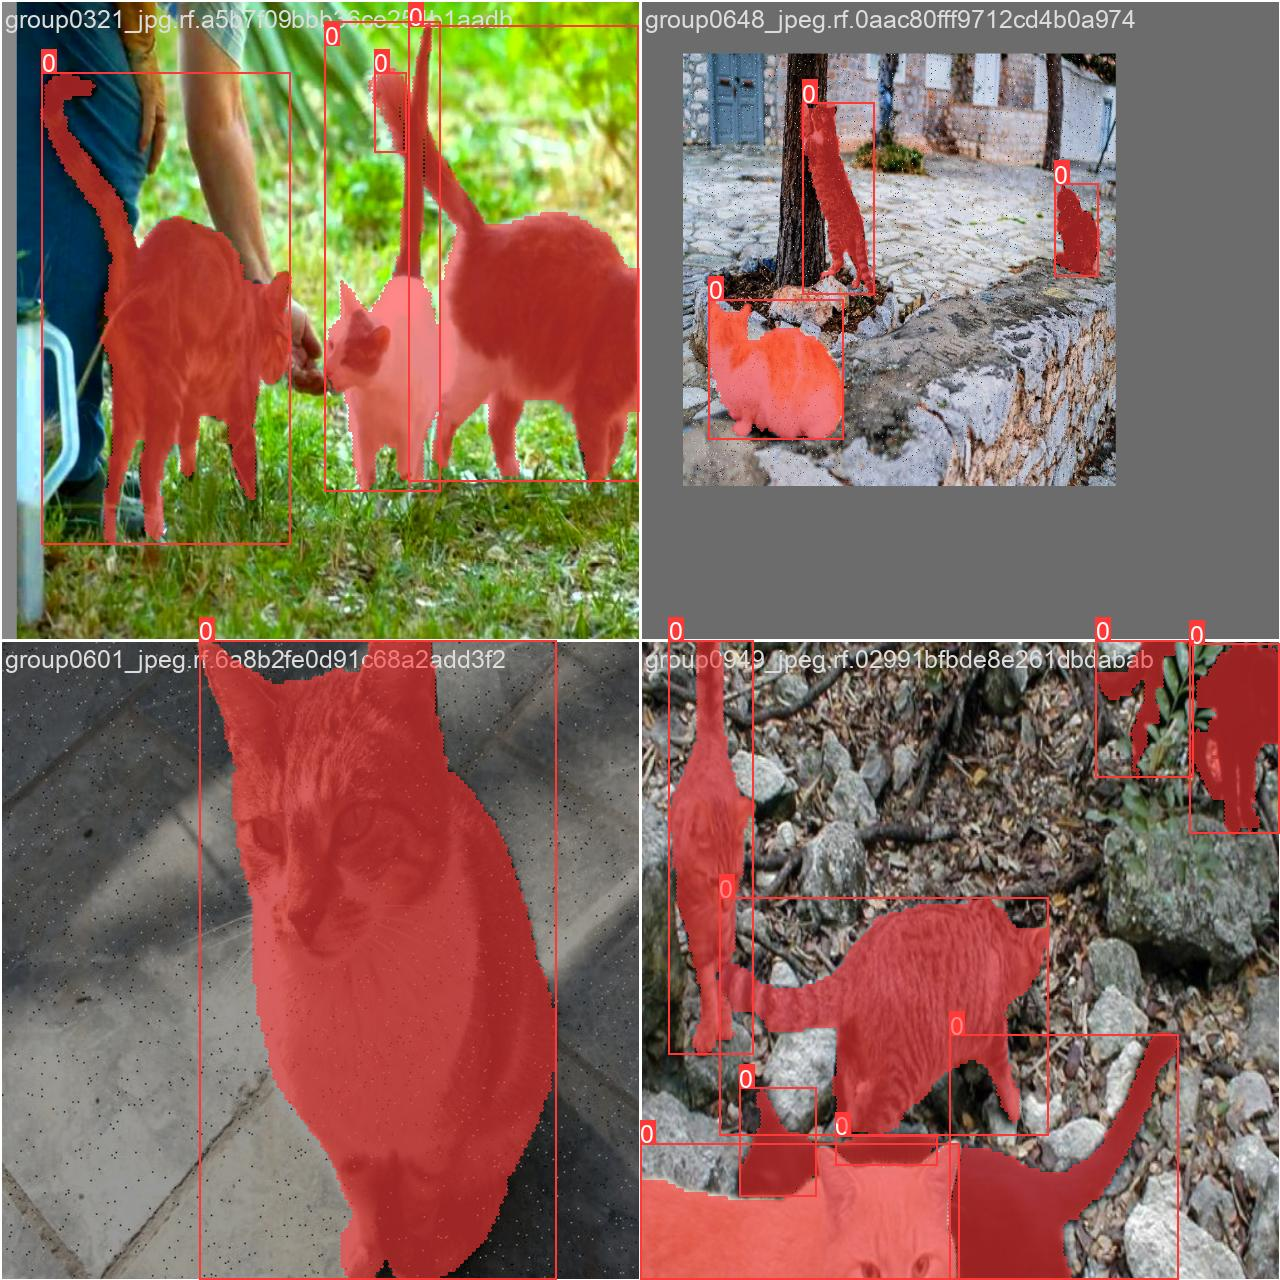

In [9]:
Image(filename='/content/gdrive/MyDrive/Cat images/models/feral-cat-segmentation.v1i.yolov8/200-epochs-/train_batch97662.jpg')

In [4]:
trained_model = YOLO('/content/gdrive/MyDrive/Cat images/models/feral-cat-segmentation.v1i.yolov8/200-epochs-/weights/best.pt')

In [5]:
!unzip /content/torre_argentina.zip

Archive:  /content/torre_argentina.zip
   creating: torre_argentina/
  inflating: torre_argentina/IMG_1053.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1053.jpeg  
  inflating: torre_argentina/IMG_1049.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1049.jpeg  
  inflating: torre_argentina/IMG_1048.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1048.jpeg  
  inflating: torre_argentina/IMG_1052.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1052.jpeg  
  inflating: torre_argentina/IMG_1051.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1051.jpeg  
  inflating: torre_argentina/IMG_1047.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1047.jpeg  
  inflating: torre_argentina/IMG_1046.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1046.jpeg  
  inflating: torre_argentina/IMG_1050.jpeg  
  inflating: __MACOSX/torre_argentina/._IMG_1050.jpeg  


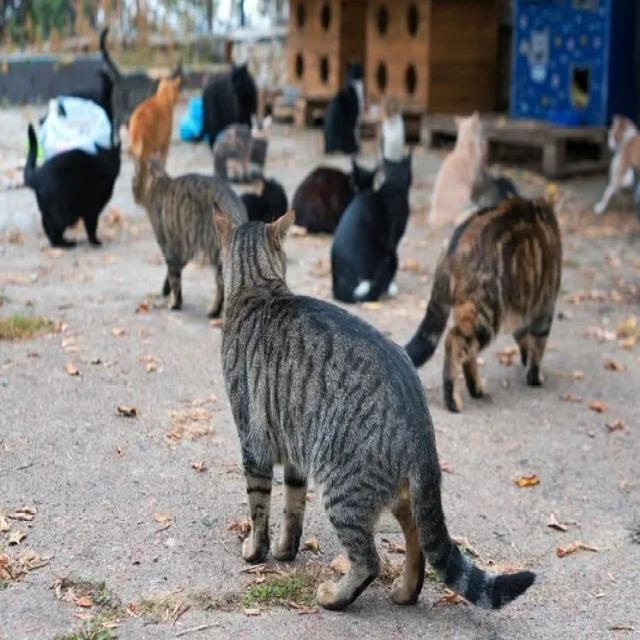

In [49]:
image_path = '/content/gdrive/MyDrive/Cat images/feral-cat-segmentation.v1i.yolov8/test/images/group0939_jpg.rf.3f8c350931357271c36c2d5b34497e2c.jpg'
# image_path = '/content/torre_argentina/IMG_1053.jpeg'
new_image = Image.open(image_path)
new_image

In [50]:
new_results = trained_model.predict(new_image, conf=0.3)


0: 640x640 14 cats, 45.9ms
Speed: 3.3ms preprocess, 45.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


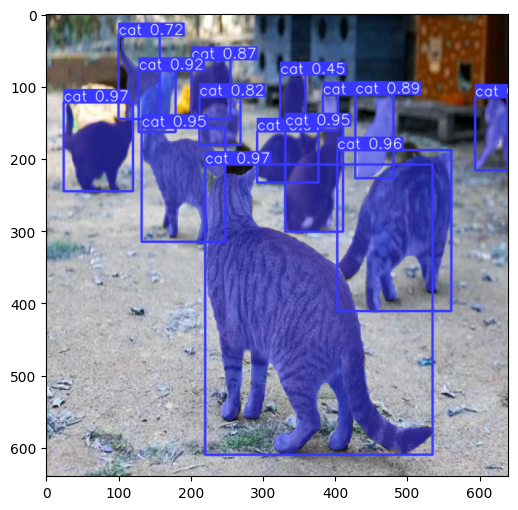

In [51]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(6,6))
plt.imshow(new_result_array)